# An analysis of Work From Home

## Step 1: Data Engineering

In [305]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv('https://raw.githubusercontent.com/majickdave/wfh_analysis/master/wfh.csv')

df.head()

,Month,Business Days,Back/Front Office,BU,AHT,Attrition Count,Attrition %,Shrink,Monthly System Outage (hours),Daily System Outage (hours),Monthly Sameday Callout (hours),Daily Sameday Callout (hours),Monthly Unplanned Out (hours),Daily Unplanned Out (hours),Monthly Planned Out (hours),Daily Planned Out (hours),Adherence,Conformance,ACW/ Call (seconds),AVG Hold Time (seconds),Monthly Processing-No Work (minutes),Daily Processing-No Work (minutes)
0,Jan-2019,21,Back Office,RAM,853.0,4.0,4.49%,34.06%,0.0,0.0,1268.03,60.38,68.75,3.27,441.00,21.00,90.08%,94.03%,NaN,NaN,NaN,#VALUE!
1,Feb-2019,19,Back Office,RAM,904.0,3.0,2.83%,34.85%,0.0,0.0,980.50,51.61,77.75,4.09,637.00,33.53,90.40%,93.44%,NaN,NaN,NaN,#VALUE!
2,Mar-2019,22,Back Office,RAM,913.0,8.0,8.25%,34.99%,0.0,0.0,854.08,38.82,129.75,5.90,856.00,38.91,92.01%,94.89%,NaN,NaN,NaN,#VALUE!
3,Apr-2019,21,Back Office,RAM,897.0,6.0,6.00%,27.08%,0.0,0.0,753.75,35.89,60.50,2.88,710.77,33.85,92.52%,95.79%,NaN,NaN,NaN,#VALUE!
4,May-2019,20,Back Office,RAM,948.0,7.0,6.36%,36.20%,0.0,0.0,820.33,41.02,106.25,5.31,1155.98,57.80,92.17%,96.09%,NaN,NaN,NaN,#VALUE!


In [306]:
df.columns

Index(['Month', 'Business Days', 'Back/Front Office', 'BU', 'AHT',
       'Attrition Count', 'Attrition %', 'Shrink',
       'Monthly System Outage (hours)', 'Daily System Outage (hours)',
       'Monthly Sameday Callout (hours)', 'Daily Sameday Callout (hours)',
       'Monthly Unplanned Out (hours)', 'Daily Unplanned Out (hours)',
       'Monthly Planned Out (hours)', 'Daily Planned Out (hours)', 'Adherence',
       'Conformance', 'ACW/ Call (seconds)', 'AVG Hold Time (seconds)',
       'Monthly Processing-No Work (minutes)',
       'Daily Processing-No Work (minutes)'],
      dtype='object')

## Drop RAM PD and RIS PD from the analysis 
those BU's aren't on the phones

In [307]:
df = df[~df['BU'].isin(['RAM PD', 'RIS PD'])]

## Drop attrition count, drop daily outage, drop daily callout, drop dailies

These columns may not be informative

In [308]:
## create a new dataframe with the desired columns
df = df[['Month', 'BU', 'AHT', 'Attrition %', 'Back/Front Office',
       'Shrink', 'Monthly System Outage (hours)', 'Monthly Sameday Callout (hours)',
       'Monthly Unplanned Out (hours)', 'Monthly Planned Out (hours)', 'Adherence', 
       'Conformance', 'ACW/ Call (seconds)', 'AVG Hold Time (seconds)',
       'Monthly Processing-No Work (minutes)']]

In [309]:
# reformat date index
df=df.rename(columns = {'Month':'date'})
df.index = pd.to_datetime(df['date'])
df = df.drop('date', 1)

# reformat percentage
df.loc[:,['Attrition %','Shrink', 'Adherence', 'Conformance']] = df[['Attrition %', 'Shrink']].replace(r'%', '', regex=True).astype('float') / 100.0

## Fill Null with 0
df = df.fillna(0)
df.head()

,BU,AHT,Attrition %,Back/Front Office,Shrink,Monthly System Outage (hours),Monthly Sameday Callout (hours),Monthly Unplanned Out (hours),Monthly Planned Out (hours),Adherence,Conformance,ACW/ Call (seconds),AVG Hold Time (seconds),Monthly Processing-No Work (minutes)
date,,,,,,,,,,,,,,
2019-01-01,RAM,853.0,0.0449,Back Office,0.3406,0.0,1268.03,68.75,441.00,0.0,0.0,0.0,0.0,0.0
2019-02-01,RAM,904.0,0.0283,Back Office,0.3485,0.0,980.50,77.75,637.00,0.0,0.0,0.0,0.0,0.0
2019-03-01,RAM,913.0,0.0825,Back Office,0.3499,0.0,854.08,129.75,856.00,0.0,0.0,0.0,0.0,0.0
2019-04-01,RAM,897.0,0.0600,Back Office,0.2708,0.0,753.75,60.50,710.77,0.0,0.0,0.0,0.0,0.0
2019-05-01,RAM,948.0,0.0636,Back Office,0.3620,0.0,820.33,106.25,1155.98,0.0,0.0,0.0,0.0,0.0


## Create a month and year column

In [310]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

## Analyze only January through August

In [311]:
## make copy for later
df1 = df.copy()

# index df on January through August
df = df.loc[df.index.month.isin(range(9)),:]

## Step 2: Begin Analysis

## Group by BU, year and month

Which year has a higher mean ```AHT``` for each BU?

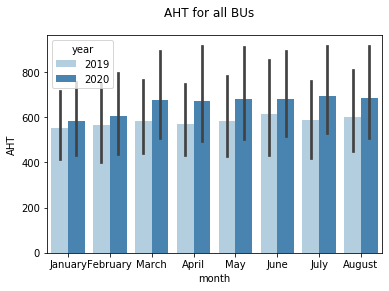

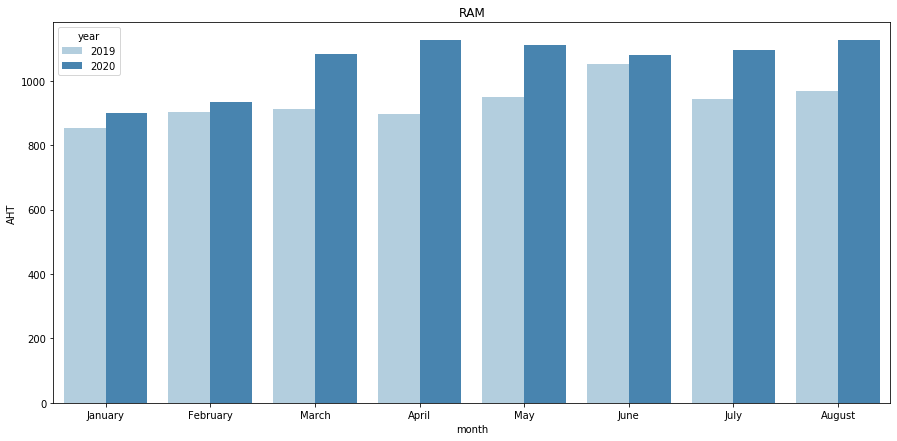

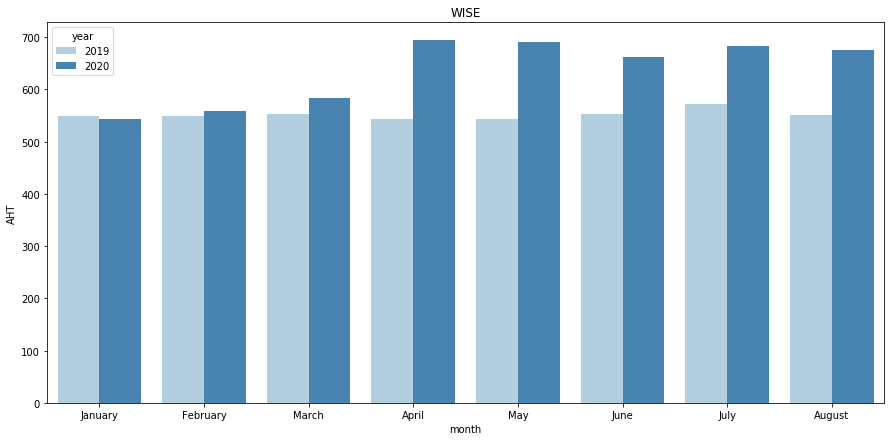

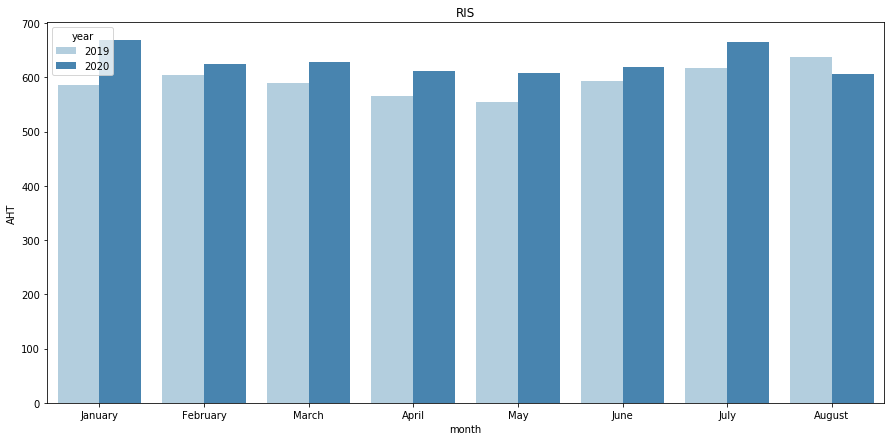

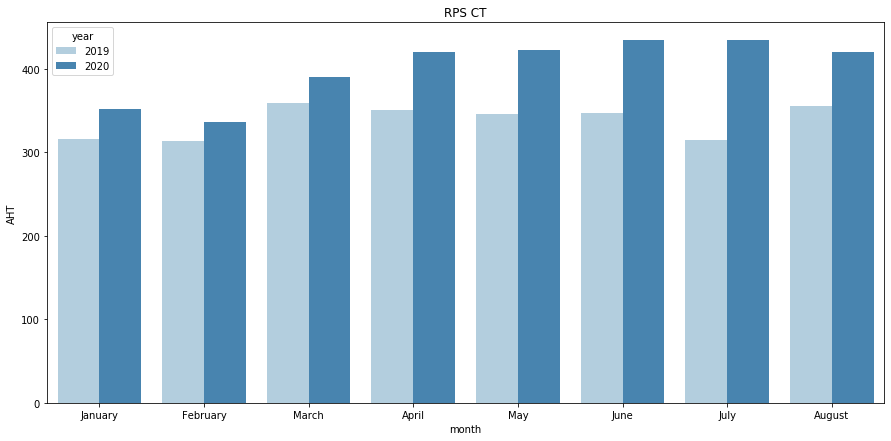

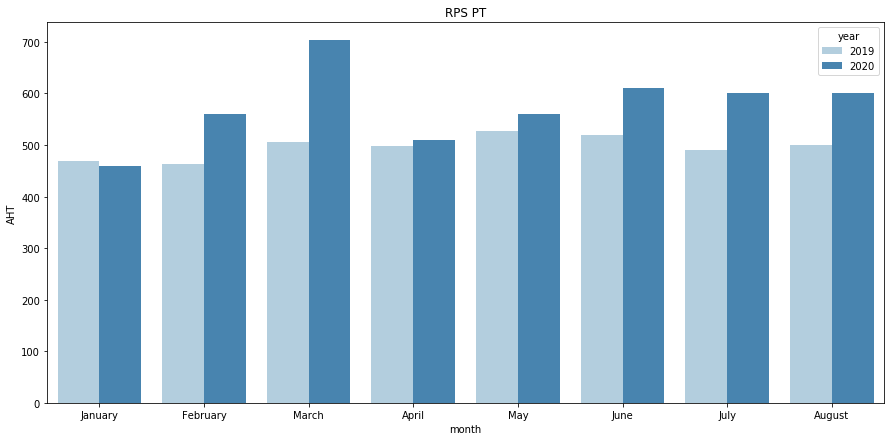

In [312]:
g = sns.barplot(data=df, palette='Blues', x='month', y='AHT', hue='year')
plt.suptitle('AHT for all BUs')
plt.show()
for bu in df['BU'].unique():
    plt.figure(figsize=(15,7))
    _ = sns.barplot(data=df[df['BU']==bu], palette='Blues', x='month', y='AHT', hue='year')
    plt.title(bu)
    plt.show()

## Compare AHT across BU's from 2019-2020

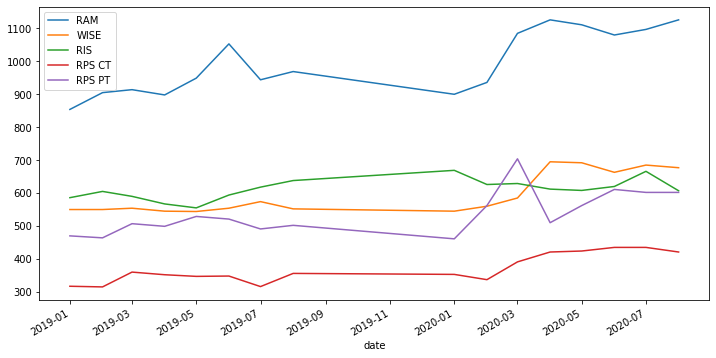

In [313]:
for bu in df['BU'].unique():
    df[df['BU']==bu]['AHT'].plot(figsize=(12,6))
plt.legend(df['BU'].unique())
plt.show()

## Compare AHT by year for each BU

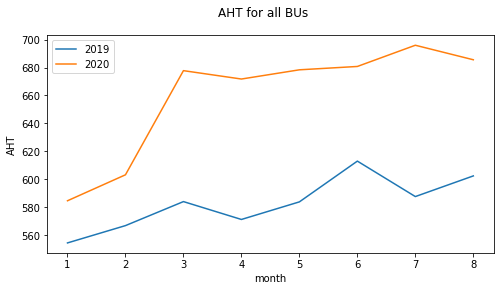

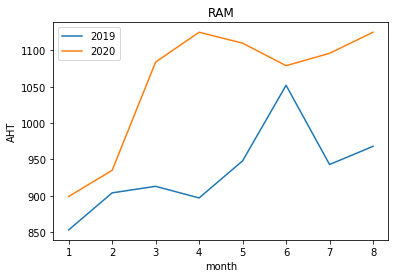

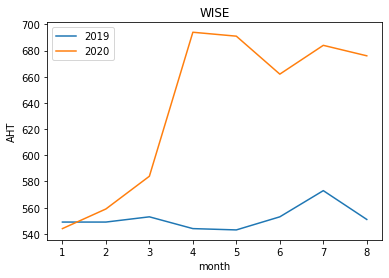

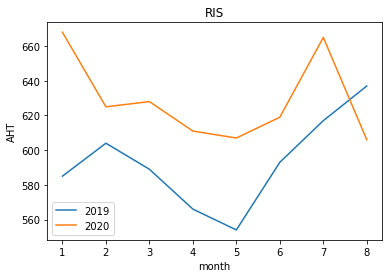

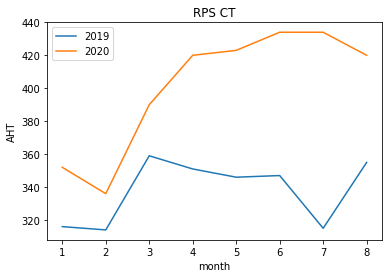

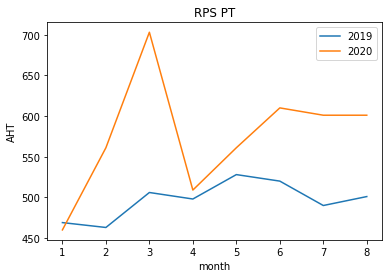

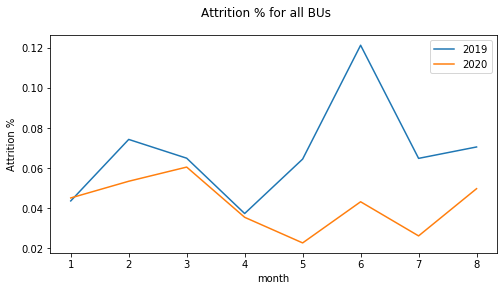

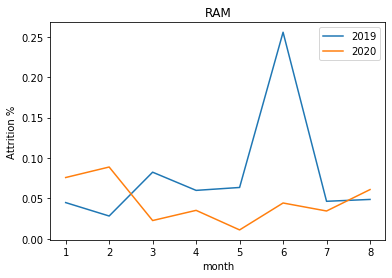

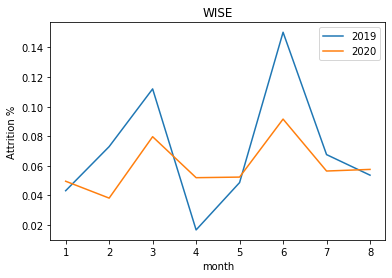

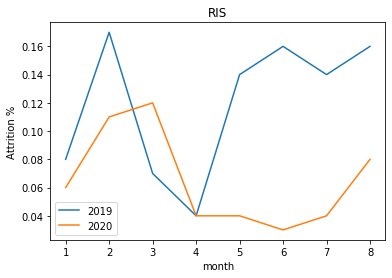

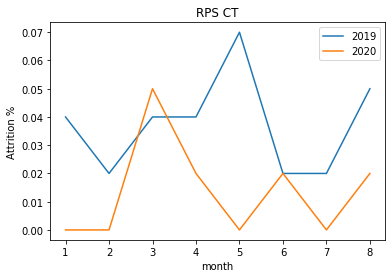

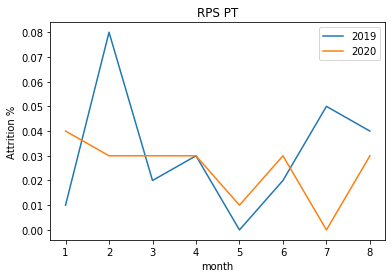


There is an issue with column Back/Front Office 



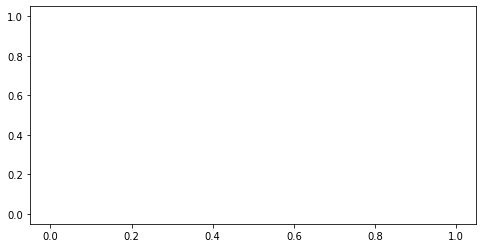

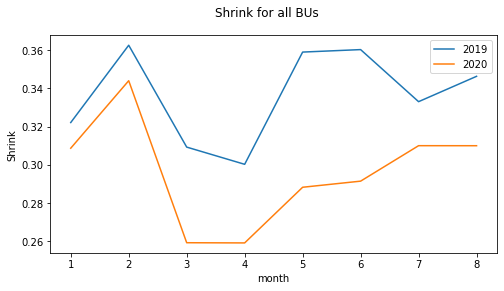

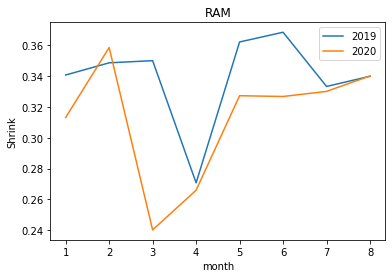

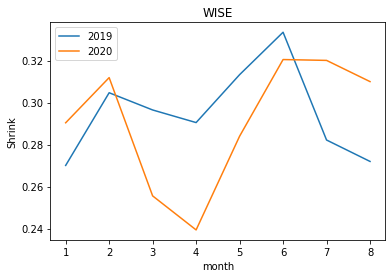

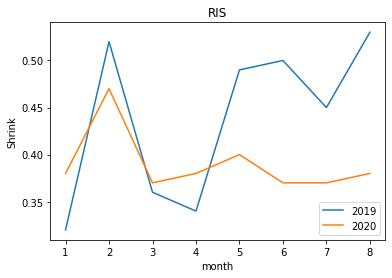

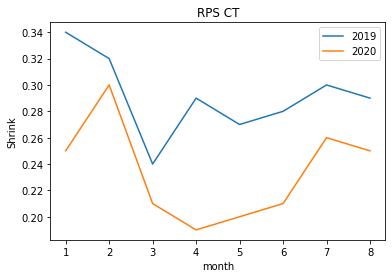

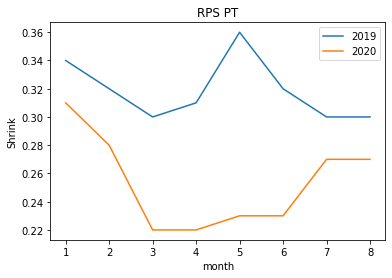

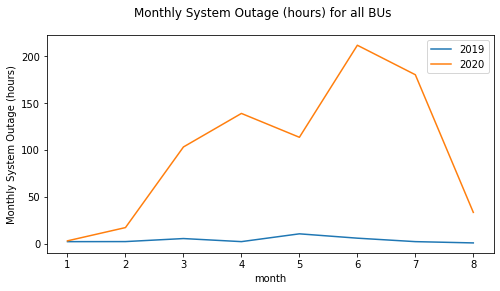

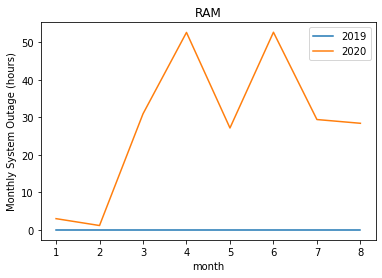

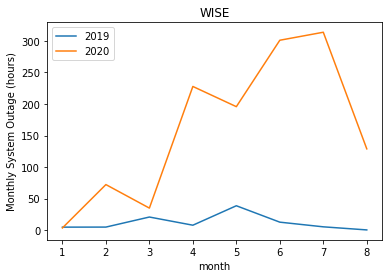

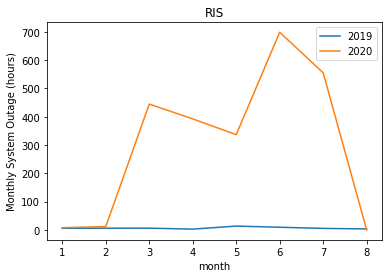

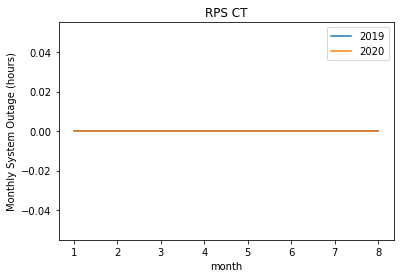

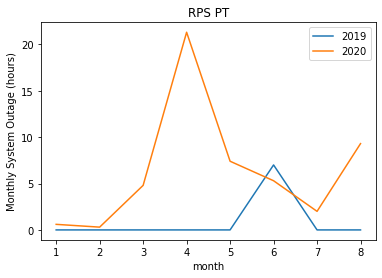

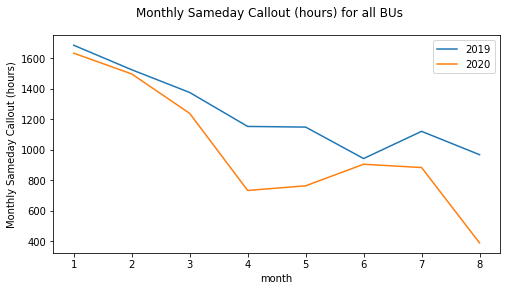

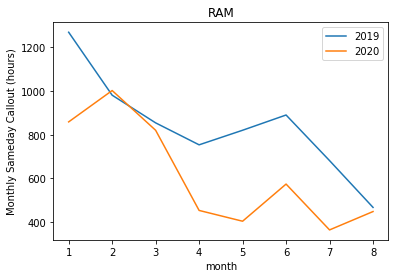

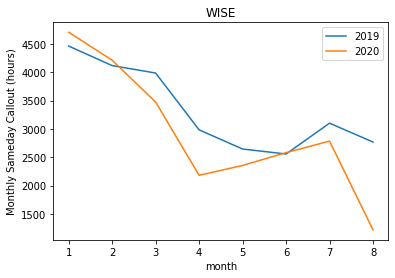

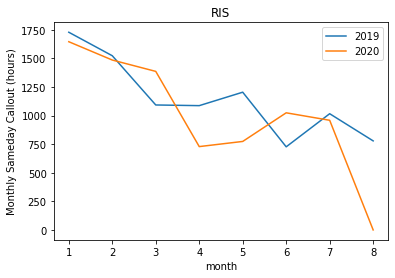

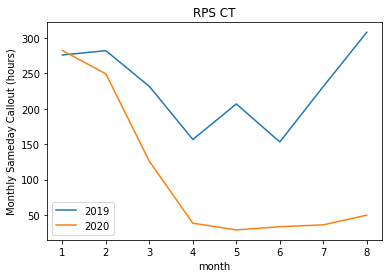

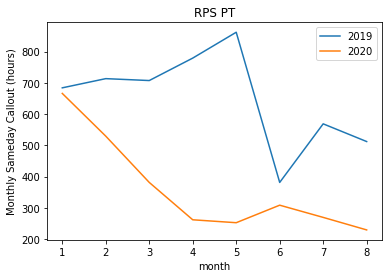

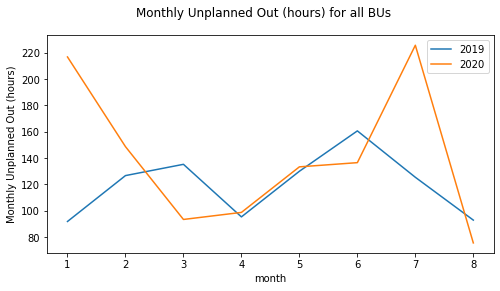

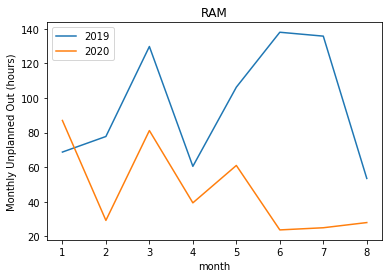

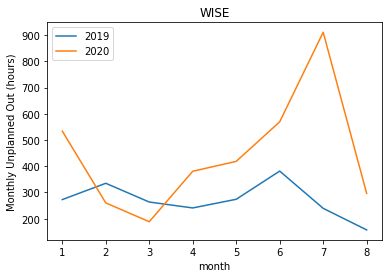

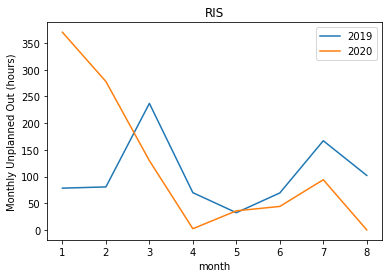

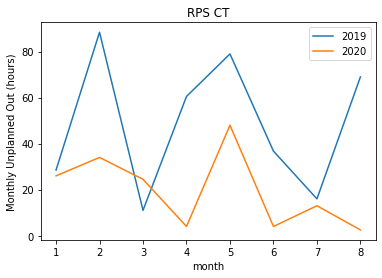

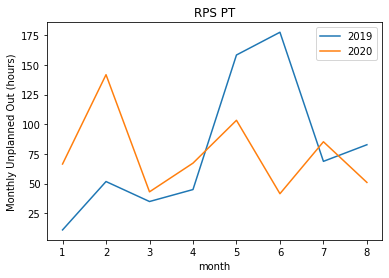

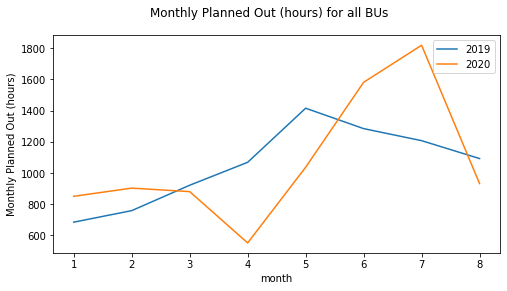

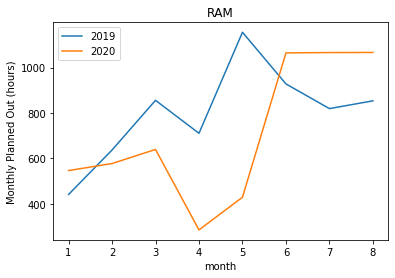

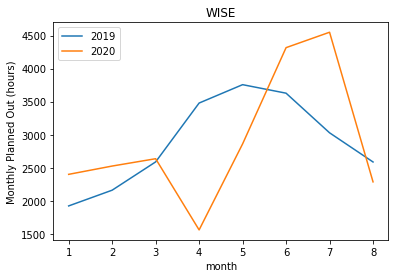

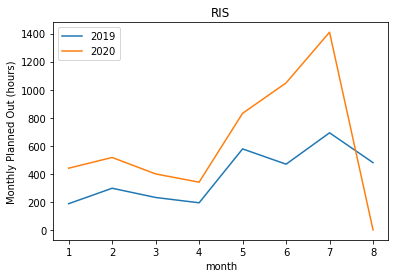

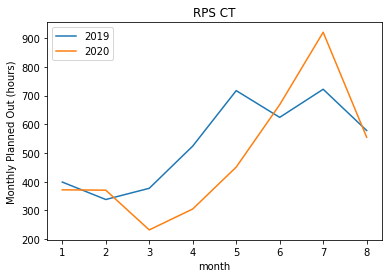

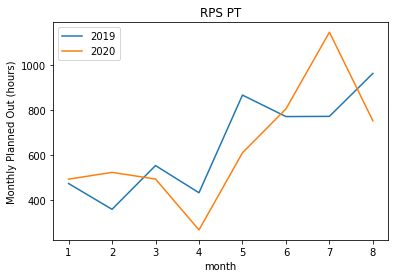

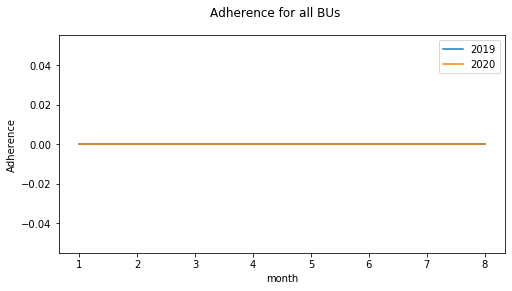

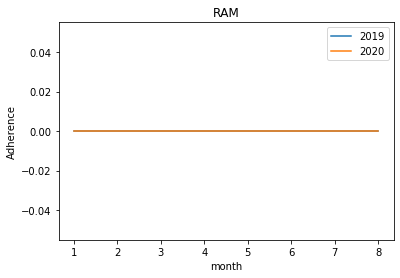

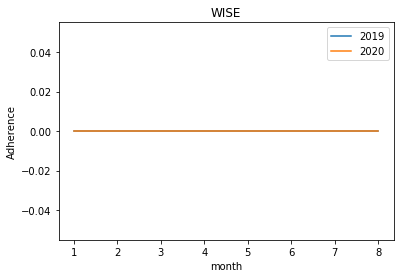

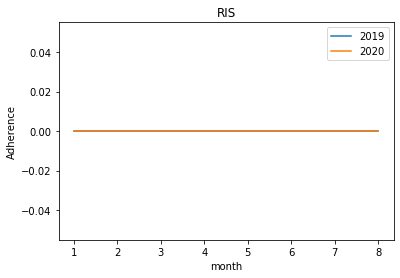

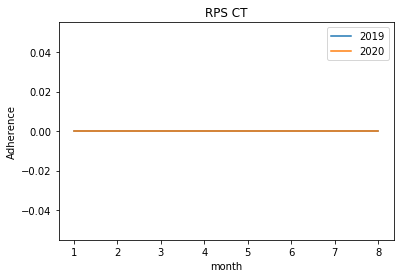

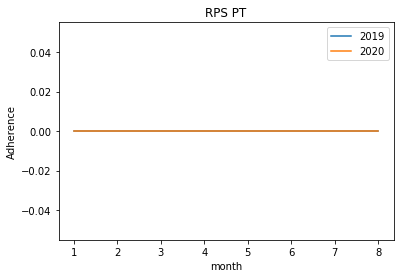

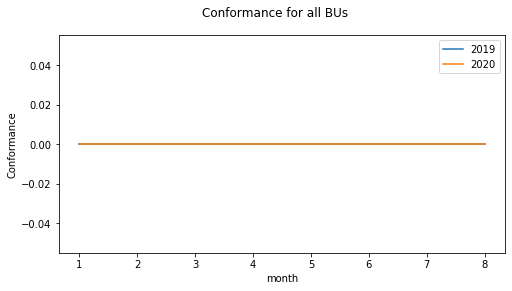

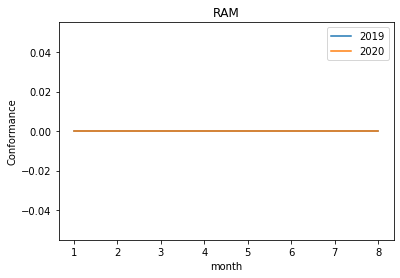

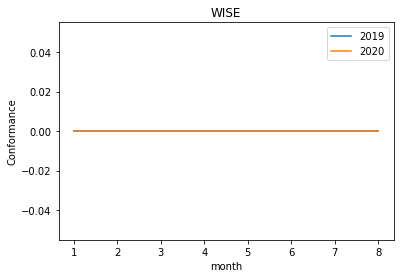

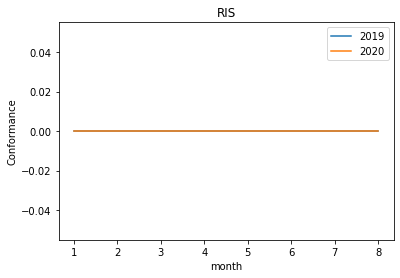

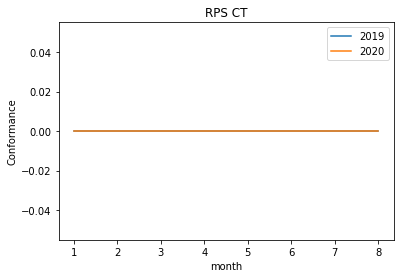

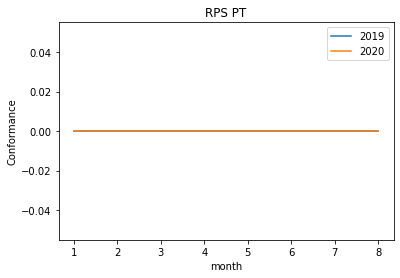

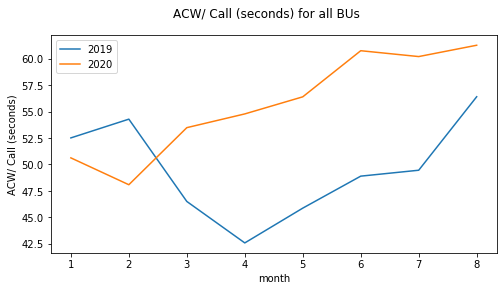

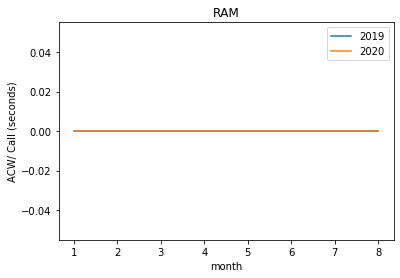

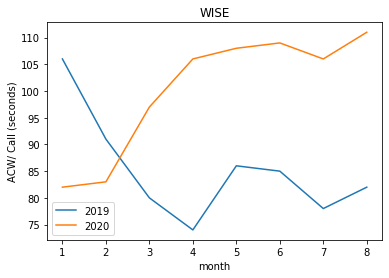

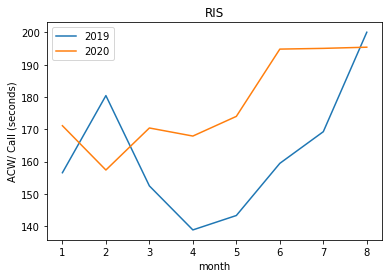

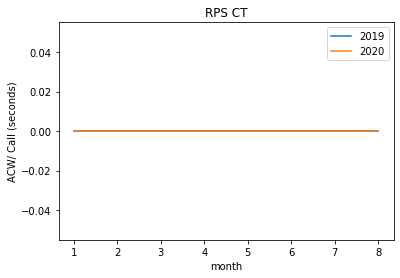

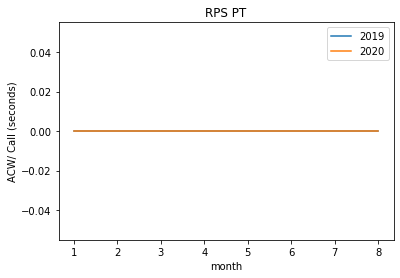

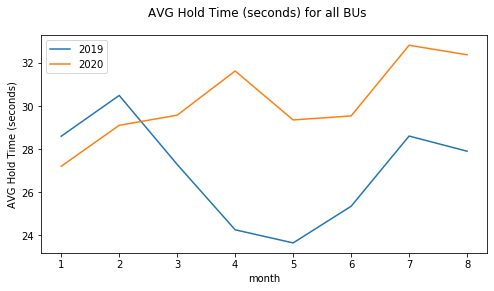

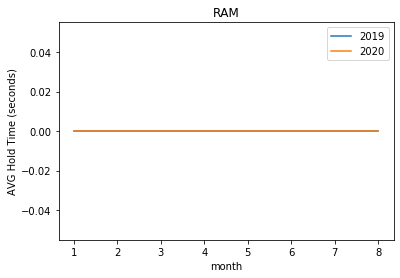

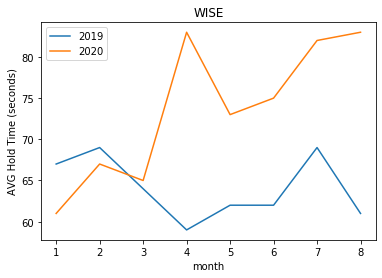

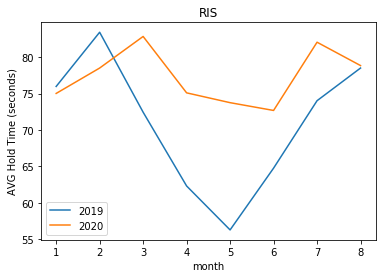

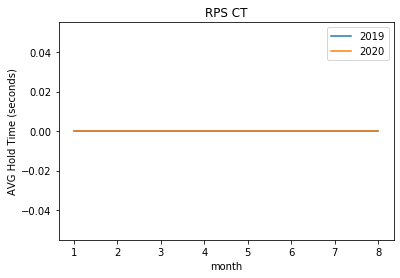

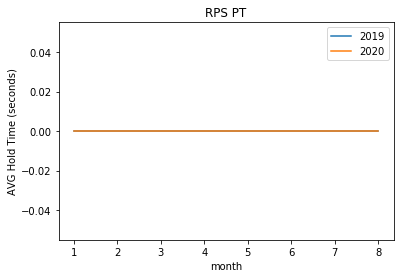

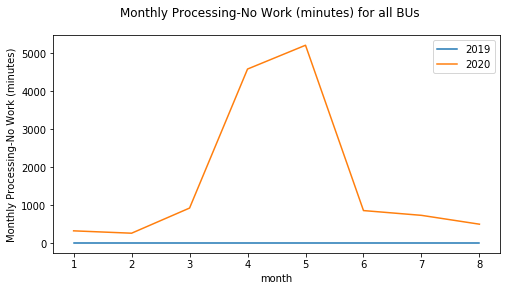

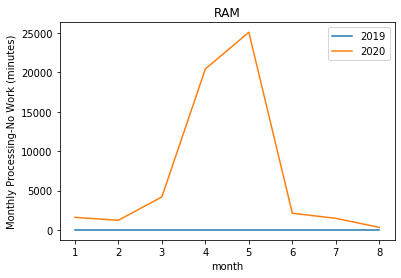

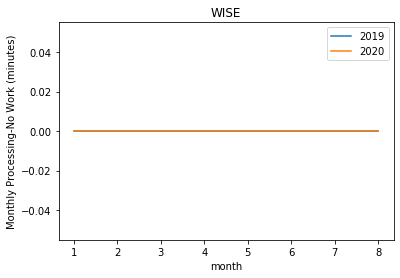

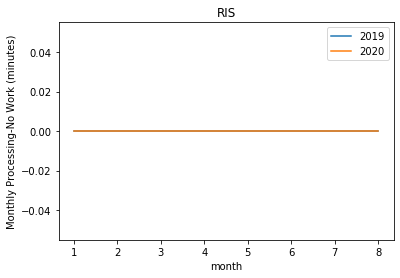

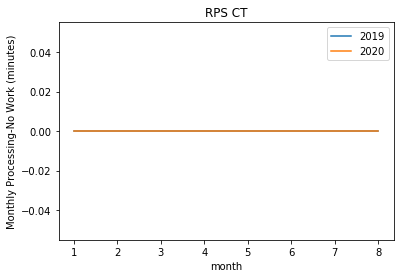

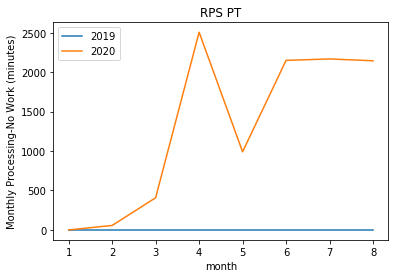

In [314]:
df['month'] = df.index.month

for c in df.columns[1:-2]:
    try:
        plt.figure(figsize=(8,4))
        ax = sns.lineplot(x='month', y=c, data=df[(df['year']==2019)], ci=None)
        ax = sns.lineplot(x='month', y=c, data=df[(df['year']==2020)], ci=None)
        plt.suptitle(c+' for all BUs')
        plt.legend([2019,2020])
        plt.show()
    except:
        print('\nThere is an issue with column', c, '\n')
        continue
    for bu in df['BU'].unique():
            ax = sns.lineplot(x='month', y=c, data=df[(df['BU']==bu) & (df['year']==2019)])
            ax = sns.lineplot(x='month', y=c, data=df[(df['BU']==bu) & (df['year']==2020)])
            plt.title(bu)
            plt.legend([2019,2020])
            plt.show()



## Is average hold time greater in 2020?

In [315]:
df['AHT'].groupby(df.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2019,40.0,582.900,200.948239,314.0,484.75,550.0,607.25,1052.0
2020,40.0,659.775,226.321361,336.0,535.25,610.5,691.75,1125.0


## The mean AHT across all business units was 580 in 2019 and 656 in 2020

In [316]:
# set df to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Examine Average Hold Time (AHT) by Business Unit (BU) for years 2019 and 2020

In [317]:
df.groupby(['BU','month', 'year']).mean()

AHT  Attrition %  Shrink  Monthly System Outage (hours)  \
BU     month year                                                               
RAM    1     2019   853.0       0.0449  0.3406                           0.00   
             2020   899.0       0.0759  0.3131                           3.00   
       2     2019   904.0       0.0283  0.3485                           0.00   
             2020   935.0       0.0889  0.3584                           1.17   
       3     2019   913.0       0.0825  0.3499                           0.00   
             2020  1084.0       0.0227  0.2403                          30.92   
       4     2019   897.0       0.0600  0.2708                           0.00   
             2020  1125.0       0.0353  0.2660                          52.60   
       5     2019   948.0       0.0636  0.3620                           0.00   
             2020  1110.0       0.0111  0.3272                          27.15   
       6     2019  1052.0       0.2556  0.3683                           0.00   
             2020  1079.0       0.0444  0.3267                          52.65   
       7     2019   943.0       0.0465  0.3332                           0.00   
             2020  1096.0       0.0345  0.3300                          29.40   
       8     2019   968.0       0.0488  0.3398                           0.00   
             2020  1125.0       0.0610  0.3400                          28.40   
RIS    1     2019   585.0       0.0800  0.3200                           5.75   
             2020   668.0       0.0600  0.3800                           7.83   
       2     2019   604.0       0.1700  0.5200                           6.07   
             2020   625.0       0.1100  0.4700                          11.85   
       3     2019   589.0       0.0700  0.3600                           6.25   
             2020   628.0       0.1200  0.3700                         444.67   
       4     2019   566.0       0.0400  0.3400                           2.85   
             2020   611.0       0.0400  0.3800                         392.38   
       5     2019   554.0       0.1400  0.4900                          13.57   
             2020   607.0       0.0400  0.4000                         336.62   
       6     2019   593.0       0.1600  0.5000                           9.43   
             2020   619.0       0.0300  0.3700                         698.55   
       7     2019   617.0       0.1400  0.4500                           5.40   
             2020   665.0       0.0400  0.3700                         555.20   
       8     2019   637.0       0.1600  0.5300                           3.45   
             2020   606.0       0.0800  0.3800                           0.00   
RPS CT 1     2019   316.0       0.0400  0.3400                           0.00   
             2020   352.0       0.0000  0.2500                           0.00   
       2     2019   314.0       0.0200  0.3200                           0.00   
             2020   336.0       0.0000  0.3000                           0.00   
       3     2019   359.0       0.0400  0.2400                           0.00   
             2020   390.0       0.0500  0.2100                           0.00   
       4     2019   351.0       0.0400  0.2900                           0.00   
             2020   420.0       0.0200  0.1900                           0.00   
       5     2019   346.0       0.0700  0.2700                           0.00   
             2020   423.0       0.0000  0.2000                           0.00   
       6     2019   347.0       0.0200  0.2800                           0.00   
             2020   434.0       0.0200  0.2100                           0.00   
       7     2019   315.0       0.0200  0.3000                           0.00   
             2020   434.0       0.0000  0.2600                           0.00   
       8     2019   355.0       0.0500  0.2900                           0.00   
             2020   420.0       0.0200  0.2500       

## Step 3: Run statistical test on AHT: RAM

To determine if there is a statistically significant difference in 2019 AHT vs. 2020 AHT for BU: RAM during March through July.

In [318]:
# create new window from march-july
df = df1.loc[df1.index.month.isin(range(3,8)),:]

In [319]:
# compare standard deviations of 2019 to 2020
df[(df['BU']=='RAM') & (df['year']==2019)]['AHT'].std(), df[(df['BU']=='RAM') & (df['year']==2020)]['AHT'].std()

(60.4838821505366, 18.912958520548813)

For the months of March through July, the standard deviation of the 2019 data is significantly higher than 2020, implying that 2019 was actually more variable than 2020.

In [320]:
## create 2 samples to test
a = df[(df['BU']=='RAM') & (df['year']==2019)]['AHT']
b = df[(df['BU']=='RAM') & (df['year']==2020)]['AHT']
    
ttest_ind(a, b, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-5.229213259634857, pvalue=0.0038707873154899724)

According to the t-test, there is a statistically significant difference between Average Hold Time (AHT) in 2019 and 2020 for the months of March through July, per p-value of 0.004.